**1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).**
Answer:

Artificial Intelligence (AI): The broad field of making machines act intelligently, performing tasks like reasoning, problem-solving, and understanding language.

Machine Learning (ML): A subset of AI where systems learn from data to improve predictions or decisions. Example: predicting stock prices.

Deep Learning (DL): A branch of ML using multi-layered neural networks that automatically learn features, effective in tasks like image and speech recognition.

Data Science (DS): An applied discipline combining statistics, ML, and domain knowledge to clean, analyze, and interpret data for insights.

**2: What are the types of machine learning? Describe each with one real-world example.**

Answer:

Supervised Learning: Uses labeled data to train models. Example: predicting house prices.

Unsupervised Learning: Finds patterns in unlabeled data. Example: customer segmentation with clustering.

Semi-Supervised Learning: Mix of labeled and unlabeled data. Example: sentiment classification with few labeled reviews.

Reinforcement Learning: Learns through rewards and penalties. Example: game-playing AI like AlphaGo.

Online Learning: Model updates as new data arrives. Example: ad click prediction.

**3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.**

Answer:

Overfitting: When a model learns noise from training data and performs poorly on test data. Example: a very deep decision tree.

Underfitting: When a model is too simple to capture patterns, leading to poor accuracy on both train and test sets.

Bias-Variance Tradeoff:

High bias → underfitting (simplistic model).

High variance → overfitting (too complex).

The goal is to balance both for better generalization.

**4: What are outliers in a dataset, and list three common techniques for handling them.**

Answer:

Outliers: Data points that differ significantly from most of the dataset, caused by errors or rare events.

Techniques to handle outliers:

Remove outliers if they are errors.

Cap extreme values using percentiles (Winsorization).

Transform values (e.g., log transformation) to reduce their effect.

**5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.**

Answer:

Process: Identify missing data, analyze patterns, and decide whether to drop or impute.

Numerical imputation: Use mean or median (median preferred when outliers exist).

Categorical imputation: Use mode (most frequent category) or introduce a “Missing” category.

**6: Write a Python program that creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets and prints the class distribution.**



In [1]:
from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_samples=1000, weights=[0.95], random_state=42)
print("Class distribution:", Counter(y))


Class distribution: Counter({np.int64(0): 947, np.int64(1): 53})


**7: Implement one-hot encoding using pandas for the following list of colors: ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.**

In [2]:
import pandas as pd
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.get_dummies(pd.DataFrame({'color': colors})['color'])
print(df)


    Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False   True  False
4  False  False   True


**8: Write a Python script to generate 1000 samples from a normal distribution, introduce 50 random missing values, fill missing values with the column mean, and plot a histogram before and after imputation.**


Missing before: 50
Missing after: 0


/tmp/ipython-input-1478654779.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x'].fillna(df['x'].mean(), inplace=True)


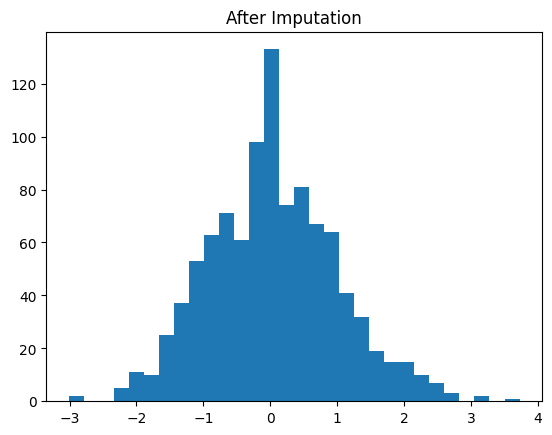

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
data = np.random.normal(0,1,1000)
df = pd.DataFrame({'x': data})
df.loc[np.random.choice(df.index, 50, replace=False),'x'] = np.nan

print("Missing before:", df['x'].isna().sum())
df['x'].fillna(df['x'].mean(), inplace=True)
print("Missing after:", df['x'].isna().sum())

plt.hist(df['x'], bins=30)
plt.title("After Imputation")
plt.show()


**9: Implement Min-Max scaling on the list [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.**

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
arr = np.array([2,5,10,15,20]).reshape(-1,1)
scaled = MinMaxScaler().fit_transform(arr)
print(scaled.flatten())


[0.         0.16666667 0.44444444 0.72222222 1.        ]


**10: You are working as a data scientist for a retail company. The dataset has missing ages, outliers in transaction amount, an imbalanced target, and categorical variables like payment method. Explain your step-by-step data preparation plan.**

Answer:

Missing Ages: Fill with median or use predictive imputation.

Outliers in Transaction Amount: Detect using IQR/z-score; cap extreme values or log-transform to reduce skew.

Imbalanced Target (fraud vs. non-fraud): Apply resampling (SMOTE/undersampling) or use class weights. Evaluate using precision, recall, and AUC instead of accuracy.

Categorical Variables: Apply one-hot encoding for low-cardinality features like payment method; for high-cardinality, use frequency or target encoding.

Final Steps: Scale numerical features if needed, split train/test with stratification, and validate using cross-validation.